In [198]:
import json
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

from urllib.request import urlopen

In [199]:
#  From Aflow database , one of the cretirea of given materials has ability to store hydorgen is stability 

API = 'http://aflow.org/API/aflux/'
hydrid_metalic= "species(H,Metals,Metals),nspecies()"
Dont_showmethis=",$catalog(ICSD),$'auid',$'spacegroup_relax',$Pearson_symbol_relax',$'aurl',$'species'"
Properties=",enthalpy_formation_atom(*0)"
MATCHBOOK=hydrid_metalic+Dont_showmethis+Properties
DIRECTIVE = '$paging(0),format(json)'
REQUEST = API + '?' + MATCHBOOK + ',' + DIRECTIVE
response0 = json.loads(urlopen(REQUEST).read().decode('utf-8'))

#----------------------------- ------ what we obtaine-------------------------------
# 1401 coumpound  stable 
#-----------------------------------------------------------------------------------

In [200]:
df=pd.DataFrame(response0)
df.to_csv('data_from_Aflow.csv',index=True)
df.head()

,compound,nspecies,enthalpy_formation_atom
0,Al8As8H32O48,4,-1.52301
1,Al2B2H6Na2O20P4,6,-2.14190
2,Al4Ba12H4O16,4,-2.44271
3,Al10Ba2H2O18,4,-2.61784
4,Al4Ba12H4O16,4,-2.28329


In [201]:
df.to_csv('data_from_Aflow.csv',index=True)

In [202]:
data=pd.read_csv('data_from_Aflow.csv')
data.head()

,Unnamed: 0,compound,nspecies,enthalpy_formation_atom
0,0,Al8As8H32O48,4,-1.52301
1,1,Al2B2H6Na2O20P4,6,-2.14190
2,2,Al4Ba12H4O16,4,-2.44271
3,3,Al10Ba2H2O18,4,-2.61784
4,4,Al4Ba12H4O16,4,-2.28329


In [203]:
df.shape

(1401, 3)

#### As we can see in data above, we have 1401 compound verifies the stability criteria, but most of theme have more than 3 species and that can be strongly affect our Gravimetrie parametre.

### What we should do   for the first ssection?

>>For the firt subsection , calcute the Gravimetrie and volumetrie for 2 species (Hydrogen, Metal), respect the cretirea of stability (just must be <0) :

>>.\
Visualization of the outcome

>>. 
The seconde subsection, calcute the gravimetrie and volumetrie for 3 species (Hydrogen, Metal,X), respect the cretirea of stability (just must be <0,  with X Metal or nonMetal.    

>>.\
Visualization of the outcome 
    

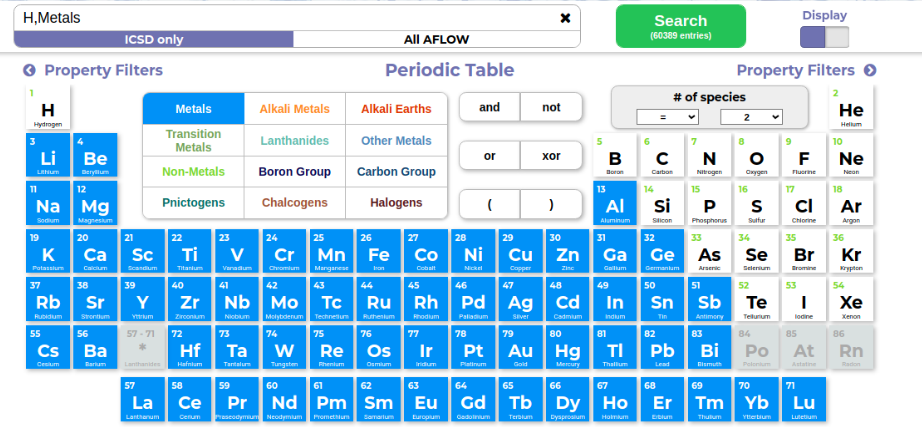

In [204]:
from IPython.display import display
from IPython.display import Image
display(Image(filename='Metals.png',width=1300))

In [205]:

API = 'http://aflow.org/API/aflux/'
hydrid_metalic= "species(H,Metals),nspecies(2)"
Dont_showmethis=",$catalog(ICSD),$'auid',$'spacegroup_relax',$Pearson_symbol_relax',$'aurl',$'species'"
Properties=",species(),composition(),enthalpy_formation_atom(*0),volume_cell(),density()"
MATCHBOOK=hydrid_metalic+Dont_showmethis+Properties
DIRECTIVE = '$paging(0),format(json)'
REQUEST = API + '?' + MATCHBOOK + ',' + DIRECTIVE
response2 = json.loads(urlopen(REQUEST).read().decode('utf-8'))
#----------------------------- ------ what we obtaine-------------------------------
#-----------------------------------------------------------------------------------

In [206]:
df2=pd.DataFrame(response2)
df2.to_csv('data_from_aflow_2_compound',index=True)
df2.head()

,compound,nspecies,species,composition,enthalpy_formation_atom,volume_cell,density
0,Al4H12,2,"[Al, H]","[4, 12]",-0.002912,181.677,1.097000
1,Ba4H8,2,"[Ba, H]","[4, 8]",-0.485538,222.797,4.154270
2,Ba4H8,2,"[Ba, H]","[4, 8]",-0.485853,222.298,4.163580
3,Ba4H8,2,"[Ba, H]","[4, 8]",-0.485552,222.816,4.153900
4,Be6H12,2,"[Be, H]","[6, 12]",-0.050471,139.179,0.789449


In [207]:
df2=pd.read_csv('data_from_aflow_2_compound')

In [208]:
df2.drop("Unnamed: 0",axis=1,inplace=True)

In [209]:
df2.head()

,compound,nspecies,species,composition,enthalpy_formation_atom,volume_cell,density
0,Al4H12,2,"['Al', 'H']","[4, 12]",-0.002912,181.677,1.097000
1,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485538,222.797,4.154270
2,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485853,222.298,4.163580
3,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485552,222.816,4.153900
4,Be6H12,2,"['Be', 'H']","[6, 12]",-0.050471,139.179,0.789449


In [210]:
#The obectif of this function is to rerange the list of a given compound  in some structue that I defined
#  for the nspecies =2  inverse.return =[metal,H], [number_of_metal,number_of_hydrogen]
#  for the nspecies =3  inverse.return =[X,Mg,H], [number_of_metalatherthan_Mg,number_of_Mg,number_of_hydrogen]
# That would be helpful for calculate the Gravemitrie and volumetrie parametres
def inverse(species,composition):  
    from ast  import literal_eval
    #  the species 
    nbr=composition  #the composition
    species=literal_eval(species)
    nbr=literal_eval(nbr)
    if len(species)==2:
        if 'H'   in species[0]: # in this case  ["H","X"]
            r=species[0]
            rn=nbr[0]
            species[0]=species[1]      
            species[1]=r
            nbr[0]=nbr[1]
            nbr[1]=rn 
            
    
    if len(species)>2:
        
        for i in range(len(species)):
            if species[i] != "Mg"   and  species[i] != 'H':
                 X=species[i] 
                 n=nbr[i]
                 indicator=i 
        if indicator+2 > len(species):
            if 'H'  in species[indicator-2]:
                r_H=species[indicator-2]
                nbr_H=nbr[indicator-2]
                species[indicator]=species[indicator-1]
                species[indicator-1]=r_H
                nbr[indicator]=nbr[indicator-1]
                nbr[indicator-1]=nbr_H
            else :
                species[indicator]=species[indicator-2]
                nbr[indicator]=nbr[indicator-2]
                

        elif indicator-1<0:
            if 'H' in species[indicator+2]:
                r_H=species[indicator+2]
                nbr_H=nbr[indicator+2]
                species[indicator+2]=species[indicator+1]
                species[indicator+1]=r_H
                nbr[indicator+2]=nbr[indicator+1]
                nbr[indicator+1]=nbr_H
        elif indicator+2==len(species):
            if 'H' in species[indicator+1]:
                r_H=species[indicator+1]
                nbr_H=nbr[indicator+1]
                species[indicator]=r_H
                species[indicator+1]=species[indicator-1]
                nbr[indicator]=nbr_H
                nbr[indicator+1]=nbr[indicator-1]
            else :
                r_H=species[indicator-1]
                species[indicator]=r_H
                nbr_H=nbr[indicator-1]
                nbr[indicator]=nbr_H
        species[0]=X
        nbr[0]=n
    return species,nbr

In [211]:
atom_symbol=[]
number_of_hydro=[]
number_of_metal=[]
for i in range(0,len(df2["species"])):
    M,nbr=inverse(df2["species"][i],df2["composition"][i])
    atom_symbol.append(M[0]),number_of_metal.append(nbr[0]),number_of_hydro.append(nbr[1])

In [212]:
# add some columns that would be also helpful for calculate the Gravimetrie and Volumetrie 
df2["nbr_of_hydro"]=number_of_hydro
df2["nbr_of_metal"]=number_of_metal
df2['atom_symbol']=atom_symbol

In [213]:
df2.head()

,compound,nspecies,species,composition,enthalpy_formation_atom,volume_cell,density,nbr_of_hydro,nbr_of_metal,atom_symbol
0,Al4H12,2,"['Al', 'H']","[4, 12]",-0.002912,181.677,1.097000,12,4,Al
1,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485538,222.797,4.154270,8,4,Ba
2,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485853,222.298,4.163580,8,4,Ba
3,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485552,222.816,4.153900,8,4,Ba
4,Be6H12,2,"['Be', 'H']","[6, 12]",-0.050471,139.179,0.789449,12,6,Be


In [214]:
### volume_cell=the volume of the simulation cell for the relaxed structure.

>>\The volumetric density of a hydrogen storage material, such as MgH2, is calculated as the mass of hydrogen (M) that can be stored within a given volume (V) of the material. It is expressed as M/V, where M is the mass of hydrogen and V is the volume of the material.
The volume V usually refers to the bulk volume of the material, not the volume of the unit cell.

>>\In the case of MgH2, the volumetric density would be the mass of hydrogen that can be stored within a certain volume of MgH2, typically expressed in units such as grams of hydrogen per liter of MgH2 (g/L) or milliliters of hydrogen gas per gram of MgH2 (mL/g). This provides an indication of how much hydrogen can be stored within a given volume of the material, which is important for practical considerations in hydrogen storage applications.

>>\The mass density, on the other hand, refers to the amount of mass of the material itself per unit volume, usually expressed in units such as kilograms per cubic meter (kg/m³) or grams per milliliter (g/mL). It is not directly related to the amount of hydrogen that can be stored within the material, but rather the mass of the material itself.

#### To calculate the volumetric of such materials,  we need to know how many atoms of hydrogen in such compound and the volume of unit celle of this coumpound.

In [215]:
df2.rename(columns={"enthalpy_formation_atom":"E_f",'density':'density( g/cm3)',"volume_cell":'volume_cell(A°3)'},inplace=True)

In [216]:
#df2["Mass_H_in_M"]=df2["number_H_in_M"]*1.008  

In [217]:
#df2["Mass_M (g)"]=df2["density( g/cm3)"]*(df2["volume_cell(A°)"]*1e-24)
#  I multiplie volume_cell by 1e-24  = 10^(-24)  for convet to cm^3

In [218]:
df2.head()

,compound,nspecies,species,composition,E_f,volume_cell(A°3),density( g/cm3),nbr_of_hydro,nbr_of_metal,atom_symbol
0,Al4H12,2,"['Al', 'H']","[4, 12]",-0.002912,181.677,1.097000,12,4,Al
1,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485538,222.797,4.154270,8,4,Ba
2,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485853,222.298,4.163580,8,4,Ba
3,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485552,222.816,4.153900,8,4,Ba
4,Be6H12,2,"['Be', 'H']","[6, 12]",-0.050471,139.179,0.789449,12,6,Be


In [219]:
#  We use the librarie periodictable to obtaine the mass_molar of eche atom in our data 
def Mass_mol(atom_symbol):
    from periodictable import elements
    Symbol_mass={}
    for element in elements:
        # Get the element symbol, name, and molar mass
        symbol = element.symbol
        name = element.name
        molar_mass = element.mass
        Symbol_mass[symbol]= molar_mass
    mass_molaire=[]
    Molar_mass_for_Hydrogen= Symbol_mass["H"]
    Molar_mass_for_Mg=Symbol_mass["Mg"]
    for atom in range(len(atom_symbol)):
        if atom_symbol[atom] in Symbol_mass.keys():
            Molar_mass=Symbol_mass[atom_symbol[atom]]
            mass_molaire.append(Molar_mass)
    # molar mass and mass_molaire is the same, the deference help in memory storage 
    return mass_molaire,Molar_mass_for_Hydrogen,Molar_mass_for_Mg

In [220]:
df2["Molar_mass"],Molar_mass_for_Hydrogen,Molar_mass_for_Mg=Mass_mol(df2["atom_symbol"])

In [221]:
df2.head()

,compound,nspecies,species,composition,E_f,volume_cell(A°3),density( g/cm3),nbr_of_hydro,nbr_of_metal,atom_symbol,Molar_mass
0,Al4H12,2,"['Al', 'H']","[4, 12]",-0.002912,181.677,1.097000,12,4,Al,26.981538
1,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485538,222.797,4.154270,8,4,Ba,137.327000
2,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485853,222.298,4.163580,8,4,Ba,137.327000
3,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485552,222.816,4.153900,8,4,Ba,137.327000
4,Be6H12,2,"['Be', 'H']","[6, 12]",-0.050471,139.179,0.789449,12,6,Be,9.012182


###  Gravimetric hydrogen storage capacity = $ \frac{Mass \quad of \quad hydrogen \quad stored}{Total \quad mass \quad of \quad material}100 $

In [222]:
M_H=df2["nbr_of_hydro"]*Molar_mass_for_Hydrogen # Molar masse of H multiply number of hydrogen  
M_M=df2["nbr_of_metal"]*df2["Molar_mass"]#   Molar masse of M multiply number of metals
df2["Gravimetrie"]=(M_H/(M_M+M_H))*100

In [223]:
df2.head()

,compound,nspecies,species,composition,E_f,volume_cell(A°3),density( g/cm3),nbr_of_hydro,nbr_of_metal,atom_symbol,Molar_mass,Gravimetrie
0,Al4H12,2,"['Al', 'H']","[4, 12]",-0.002912,181.677,1.097000,12,4,Al,26.981538,10.077600
1,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485538,222.797,4.154270,8,4,Ba,137.327000,1.446705
2,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485853,222.298,4.163580,8,4,Ba,137.327000,1.446705
3,Ba4H8,2,"['Ba', 'H']","[4, 8]",-0.485552,222.816,4.153900,8,4,Ba,137.327000,1.446705
4,Be6H12,2,"['Be', 'H']","[6, 12]",-0.050471,139.179,0.789449,12,6,Be,9.012182,18.279549


In [224]:
mole= 6.022*1e23 # of atome 
Angshtrom3_to_cm3=1e-24
m3_to_L=1000

In [225]:
df2.drop(["nspecies","species"],axis=1,inplace=True)

$$Volumetrie = \frac{nbr_H*M(H)*10^{-3}}{Volume\_cell(A°^3)*Na*10^{-24}}$$

In [231]:
df2["Volumetrie(Kg H/L)"]=(df2["nbr_of_hydro"]*Molar_mass_for_Hydrogen*10)/(df2["volume_cell(A°3)"]*6.023)

In [232]:
df2.head()

,compound,composition,E_f,volume_cell(A°3),density( g/cm3),nbr_of_hydro,nbr_of_metal,atom_symbol,Molar_mass,Gravimetrie,Volumetrie(Kg H/L)
0,Al4H12,"[4, 12]",-0.002912,181.677,1.097000,12,4,Al,26.981538,10.077600,0.110536
1,Ba4H8,"[4, 8]",-0.485538,222.797,4.154270,8,4,Ba,137.327000,1.446705,0.060090
2,Ba4H8,"[4, 8]",-0.485853,222.298,4.163580,8,4,Ba,137.327000,1.446705,0.060225
3,Ba4H8,"[4, 8]",-0.485552,222.816,4.153900,8,4,Ba,137.327000,1.446705,0.060085
4,Be6H12,"[6, 12]",-0.050471,139.179,0.789449,12,6,Be,9.012182,18.279549,0.144288


In [233]:
df2[40:50]

,compound,composition,E_f,volume_cell(A°3),density( g/cm3),nbr_of_hydro,nbr_of_metal,atom_symbol,Molar_mass,Gravimetrie,Volumetrie(Kg H/L)
40,H1Li1,"[1, 1]",-0.409173,15.9560,0.827242,1,1,Li,6.941,12.680181,0.104881
41,H1Li1,"[1, 1]",-0.408824,15.9547,0.827307,1,1,Li,6.941,12.680181,0.104890
42,H1Li1,"[1, 1]",-0.409184,15.9525,0.827422,1,1,Li,6.941,12.680181,0.104904
43,H4Mg2,"[4, 2]",-0.177296,60.3895,1.447500,4,2,Mg,24.305,7.658862,0.110846
44,H4Mg2,"[4, 2]",-0.177546,60.2439,1.450990,4,2,Mg,24.305,7.658862,0.111114
45,H8Mg4,"[8, 4]",-0.176639,118.6130,1.473920,8,4,Mg,24.305,7.658862,0.112870
46,H4Mg2,"[4, 2]",-0.177157,60.3662,1.448050,4,2,Mg,24.305,7.658862,0.110889
47,H4Mg2,"[4, 2]",-0.176703,60.0470,1.455750,4,2,Mg,24.305,7.658862,0.111478
48,H8Mg4,"[8, 4]",-0.176397,118.6950,1.472910,8,4,Mg,24.305,7.658862,0.112792
49,H2Mg1,"[2, 1]",-0.067481,26.4366,1.653270,2,1,Mg,24.305,7.658862,0.126604


In [234]:
#  this function allow to sorted the Gravimetrie or Volumetrie from min to max 
# That would be helpful 
def compare_array_float(A):
    for j in range (len(A)):
        minimum=A[j]
        for i in range(j+1,len(A)):
            if A[i]< minimum:
                minimum=A[i]
                A[i]=A[j]
                A[j]=minimum
    return A

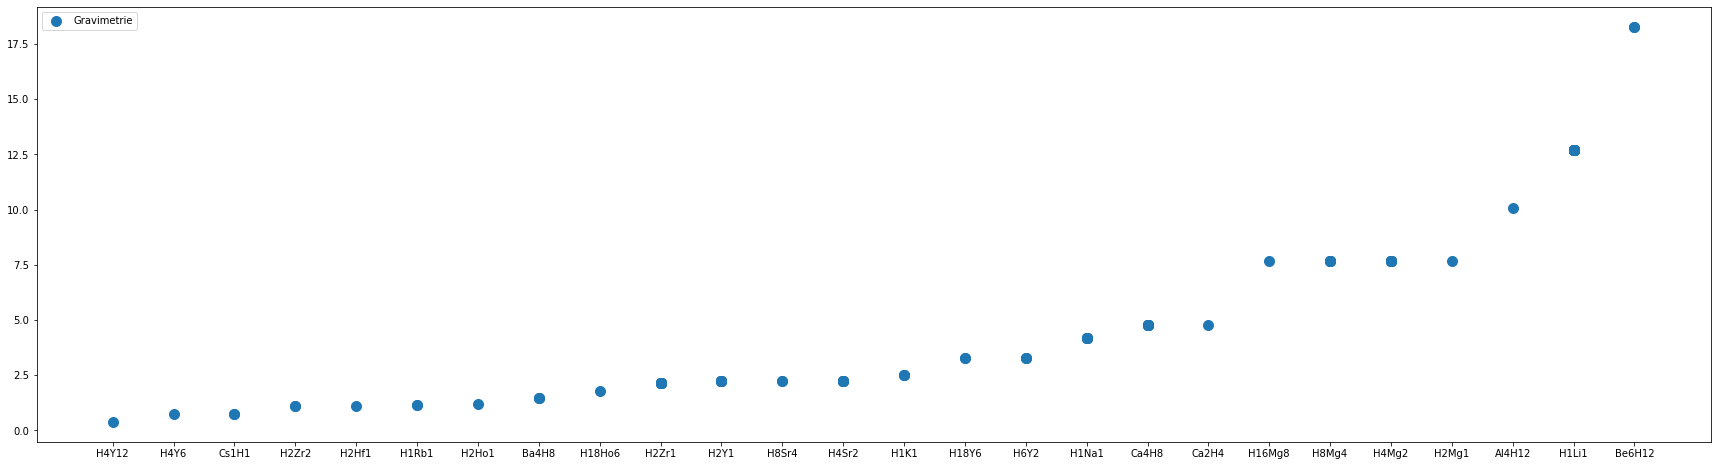

In [235]:
df2_Gr_array=np.array(df2["Gravimetrie"])
indice=df2_Gr_array.argsort()  #  to extract indix 
x=np.array(df2["compound"])[indice]#  
y=compare_array_float(df2_Gr_array) #  to ordred the gravimetrie values 

plt.figure(figsize=(30,8))
plt.scatter(x,y,s=100,label="Gravimetrie")
plt.legend()

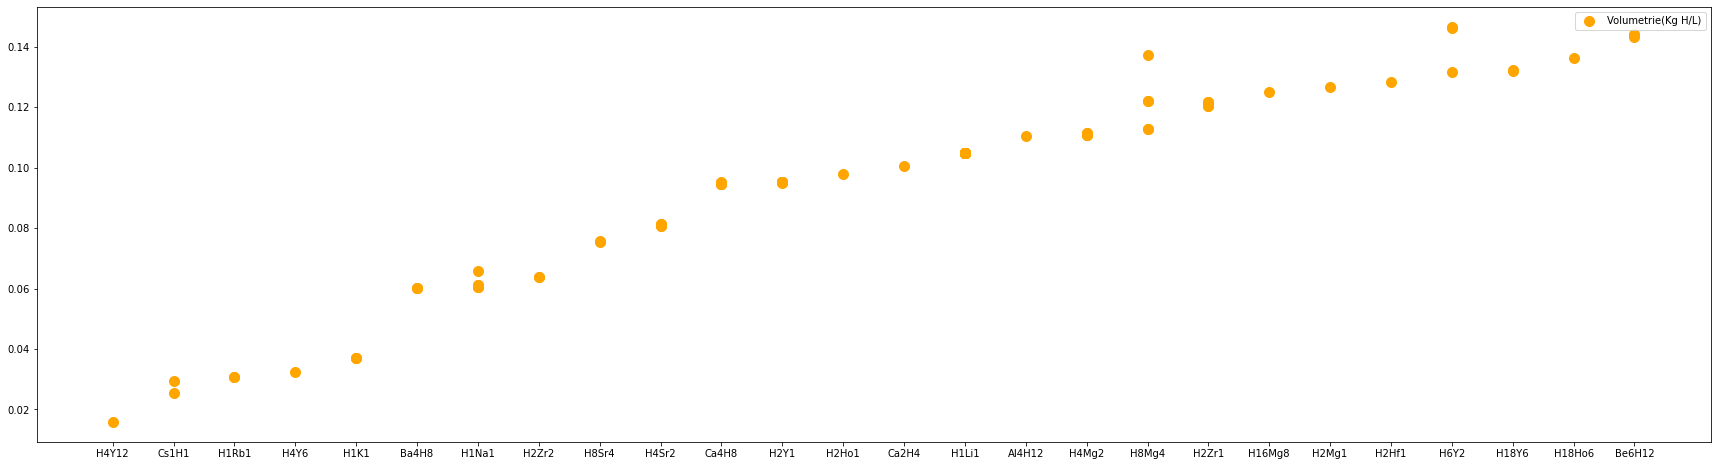

In [236]:
df2_V_array=np.array(df2["Volumetrie(Kg H/L)"])
indice=df2_V_array.argsort()  #  to extract indix 
x1=np.array(df2["compound"])[indice]#  
y1=compare_array_float(df2_V_array)

plt.figure(figsize=(30,8))
plt.scatter(x1,y1,s=100,c='orange',label="Volumetrie(Kg H/L)")
plt.legend()

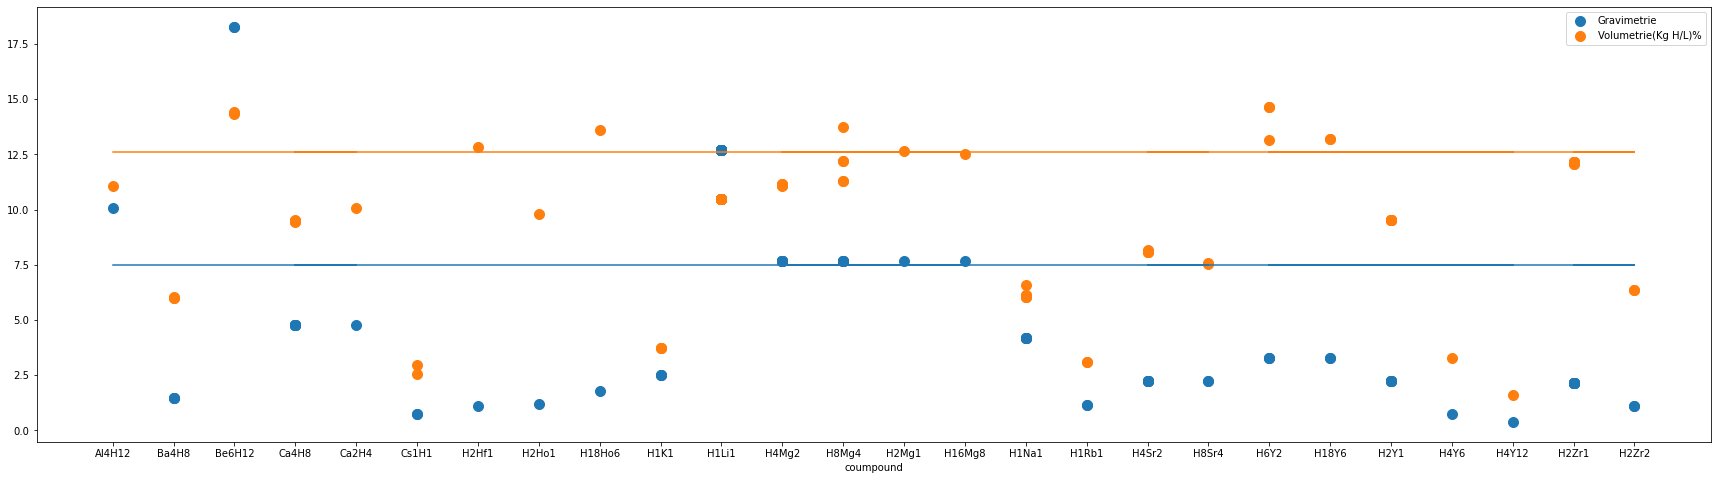

In [237]:
x=np.array(df2["compound"])#  
y=np.array(df2['Gravimetrie'])  
y1=np.array(df2['Volumetrie(Kg H/L)'])
lG=np.ones((len(x)))*7.5
lV=np.ones((len(x)))*0.126

plt.figure(figsize=(30,8))
plt.scatter(x,y,s=100,label="Gravimetrie")
#we change the scale for y1 axis.
plt.scatter(x,y1*100,s=100,label='Volumetrie(Kg H/L)%')
plt.plot(x,lG)
plt.plot(x,lV*100)
plt.xlabel("coumpound")
plt.legend()


#### As we know, atom can in categorie of  AlkaliMetals  and in the same time  in Metals categories.
#### To avoid this repetition we have to eliminate such compound in such a way we let one coumpound of a given structure 

###  Step 2  , Dopage 

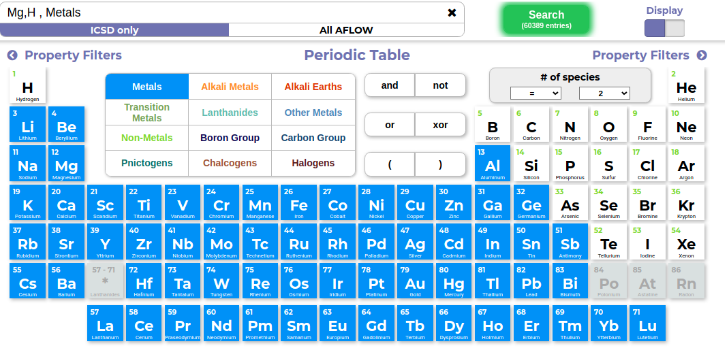

In [238]:
display(Image(filename='Mg_Metals.png',width=1300))

In [239]:

API='http://aflow.org/API/aflux/'
hydrid_metalic= "species(Mg,H,Metals),nspecies(3)"
Dont_showmethis=",$catalog(ICSD),$'auid',$'spacegroup_relax',$Pearson_symbol_relax',$'aurl',$'species'"
Properties=",species(),composition(),enthalpy_formation_atom(*0),volume_cell(),density()"
MATCHBOOK=hydrid_metalic+Dont_showmethis+Properties
DIRECTIVE = '$paging(0),format(json)'
REQUEST = API + '?' + MATCHBOOK + ',' + DIRECTIVE
response_0 = json.loads(urlopen(REQUEST).read().decode('utf-8'))
#----------------------------- ------ what we obtaine-------------------------------
#-----------------------------------------------------------------------------------


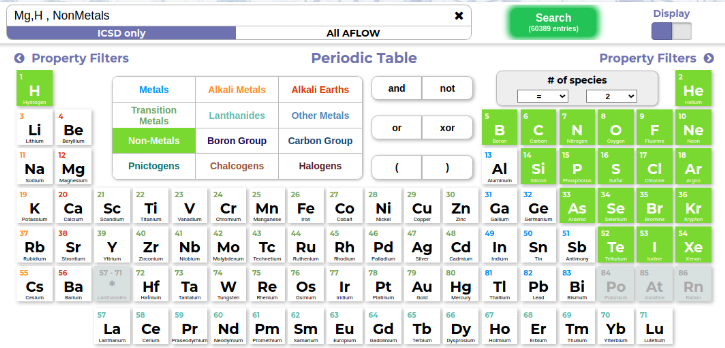

In [240]:
display(Image(filename='NonMetals.png',width=1300))

In [241]:
API = 'http://aflow.org/API/aflux/'
#:(Mg,H,Pnictogens):(Mg,H,Pnictogens):(Mg,H,AlkaliEarths):(Mg,H,AlkaliMetals):(Mg,H,BoronGroup)
hydrid_metalic= "species(Mg,H,NonMetals),nspecies(3)"

Dont_showmethis=",$catalog(ICSD),$'auid',$'spacegroup_relax',$Pearson_symbol_relax',$'aurl',$'species'"
Properties=",species(),composition(),enthalpy_formation_atom(*0),volume_cell(),density()"
MATCHBOOK=hydrid_metalic+Dont_showmethis+Properties
DIRECTIVE = '$paging(0),format(json)'
REQUEST = API + '?' + MATCHBOOK + ',' + DIRECTIVE
response_1= json.loads(urlopen(REQUEST).read().decode('utf-8'))
#----------------------------- ------ what we obtaine-------------------------------
#-----------------------------------------------------------------------------------

In [242]:
df0=pd.DataFrame(response_0)
df0.to_csv('data_from_aflow_m0_compound',index=True)
df0.shape

(74, 7)

In [243]:
df1=pd.DataFrame(response_1)
df1.to_csv('data_from_aflow_m1_compound',index=True)
df1.shape

(37, 7)

In [244]:
df0=pd.read_csv('data_from_aflow_m0_compound')
df1=pd.read_csv('data_from_aflow_m1_compound')

In [245]:
df=pd.DataFrame(np.concatenate((df0,df1),axis=0))
df.columns=df0.columns

In [246]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [247]:
#To count the number of repetitions of a compound in our data.  
def repeated_compound(df):
    X_count={}
    e_count={}
    for i in range(len(df['compound'])):
        x=df["compound"][i]
        y=df["enthalpy_formation_atom"][i]
        c=list(df["compound"]).count(x)
        e=list(df["enthalpy_formation_atom"]).count(y)
        if c>1 and e>1:
            X_count[x]=c
            e_count[y]=e
    print("compound:",X_count,'\n\n',"energy:",e_count,end="")

In [248]:
print(repeated_compound(df))

compound: {'B4H16Mg2': 14, 'B8H32Mg4': 4, 'B8H31Mg4': 2, 'B2H8Mg1': 2, 'B8H30Mg4': 2, 'H3K1Mg1': 6, 'H64Mg16N32': 4, 'H2Mg1O2': 34, 'H4Mg6O8': 2, 'H4Mg3O5': 2, 'H2Mg2O3': 2, 'H2Mg5O6': 2, 'H2Mg4O5': 2, 'H8Mg5O9': 2} 

 energy: {-0.226328: 2, -0.226399: 2, -0.226401: 2, -0.204682: 2, -0.178917: 2, -0.184809: 2, -0.226447: 2, -0.188873: 2, -0.103059: 2, -0.206281: 2, -0.201756: 2, -0.20873: 2, -0.254863: 2, -0.254949: 2, -0.539377: 2, -0.539271: 2, -1.74091: 2, -1.74369: 2, -1.74379: 4, -2.16146: 2, -1.8924: 2, -1.74368: 2, -1.7437: 2, -1.74308: 2, -2.00305: 2, -1.74109: 2, -1.7401: 2, -1.74123: 2, -1.74213: 2, -1.74336: 2, -2.33026: 2, -2.26369: 2, -1.74114: 2, -1.74295: 2, -1.74214: 2, -1.74338: 2, -1.82393: 2, -1.74391: 2}None


In [249]:
# As its name indicate this function check if we have the repetition of compound with same formula and the same enthalpy_formation_atom. 
# We assume of we can't fund one compound in deferent sturcure and the same enthalpy_formation_atom. 
def check(ds):
    size=len(ds.index)
    #print("size befor loop=" ,size)
    for j in range(size):
       # print('j=',j)
        if j<size :
            comp=ds['compound'][j]
            ene=ds["enthalpy_formation_atom"][j]
            for i in range(j+1,size):
                if i < size:
                    if ((comp ==ds['compound'][i]) and (ene==ds["enthalpy_formation_atom"][i])):
                        ds.drop(ds.index[i],axis=0,inplace=True)  #  si vous avez rencontrer une composer avec meme element chimique et meme energie de formation elimnier le deuxieme et concerver le premier 
                        size=len(ds.index)
                        #print(ds)
                        #print("size in loop",size)
                        ds.index=[k for k in range(len(ds['compound']))] 

                   # print("i",i)
    return ds

In [250]:
df=check(df)

In [251]:
repeated_compound(df)

compound: {} 

 energy: {}

In [252]:
df.rename(columns={"enthalpy_formation_atom":"E_f",'density':'density( g/cm3)',"volume_cell":'volume_cell(A°3)'},inplace=True)

In [253]:
df.head()

,compound,nspecies,species,composition,E_f,volume_cell(A°3),density( g/cm3)
0,Al2H8Mg1,3,"['Al', 'H', 'Mg']","[2, 8, 1]",-0.018904,140.427,1.02086
1,Al2H8Mg1,3,"['Al', 'H', 'Mg']","[2, 8, 1]",-0.018618,140.096,1.02327
2,Al2H8Mg1,3,"['Al', 'H', 'Mg']","[2, 8, 1]",-0.018437,139.315,1.02901
3,Al2H8Mg1,3,"['Al', 'H', 'Mg']","[2, 8, 1]",-0.018054,137.987,1.03891
4,Al4H20Mg4,3,"['Al', 'H', 'Mg']","[4, 20, 4]",-0.068137,248.665,1.50454


In ordre to calculate gravimetrie and volumetrie we need to now how many atoms for hydrogen in a given compound and what is the  Molar mass for each elements  in this compound 

In [254]:
atom_symbol=[]
number_of_hydro=[]
number_of_Mg=[]
number_of_atom=[]
for i in range(0,len(df["species"])):
    M,nbr=inverse(df["species"][i],df["composition"][i])
    atom_symbol.append(M[0]),number_of_atom.append(nbr[0]),number_of_hydro.append(nbr[1]),number_of_Mg.append(nbr[2])

In [255]:
df["nbr_of_!Mg"]=number_of_atom
df["nbr_of_hydro"]=number_of_hydro
df["nbr_of_Mg"]=number_of_Mg
df['atom_symbol']=atom_symbol

In [256]:
df.head()

,compound,nspecies,species,composition,E_f,volume_cell(A°3),density( g/cm3),nbr_of_!Mg,nbr_of_hydro,nbr_of_Mg,atom_symbol
0,Al2H8Mg1,3,"['Al', 'H', 'Mg']","[2, 8, 1]",-0.018904,140.427,1.02086,2,8,1,Al
1,Al2H8Mg1,3,"['Al', 'H', 'Mg']","[2, 8, 1]",-0.018618,140.096,1.02327,2,8,1,Al
2,Al2H8Mg1,3,"['Al', 'H', 'Mg']","[2, 8, 1]",-0.018437,139.315,1.02901,2,8,1,Al
3,Al2H8Mg1,3,"['Al', 'H', 'Mg']","[2, 8, 1]",-0.018054,137.987,1.03891,2,8,1,Al
4,Al4H20Mg4,3,"['Al', 'H', 'Mg']","[4, 20, 4]",-0.068137,248.665,1.50454,4,20,4,Al


In [257]:
df.drop(['nspecies','species','composition'],axis=1,inplace=True)


In [258]:
df.head()

,compound,E_f,volume_cell(A°3),density( g/cm3),nbr_of_!Mg,nbr_of_hydro,nbr_of_Mg,atom_symbol
0,Al2H8Mg1,-0.018904,140.427,1.02086,2,8,1,Al
1,Al2H8Mg1,-0.018618,140.096,1.02327,2,8,1,Al
2,Al2H8Mg1,-0.018437,139.315,1.02901,2,8,1,Al
3,Al2H8Mg1,-0.018054,137.987,1.03891,2,8,1,Al
4,Al4H20Mg4,-0.068137,248.665,1.50454,4,20,4,Al


In [259]:
df["Molar_mass"],Molar_mass_for_Hydrogen,Molar_mass_for_Mg=Mass_mol(df["atom_symbol"])

In [260]:
M_H=df["nbr_of_hydro"]*Molar_mass_for_Hydrogen
M_M=(df["nbr_of_!Mg"]*df["Molar_mass"])+(df['nbr_of_Mg']*Molar_mass_for_Mg)
df["Gravimetrie"]=(M_H/(M_M+M_H))*100

In [261]:
df["Volumetrie(Kg H/L)"]=(df["nbr_of_hydro"]*Molar_mass_for_Hydrogen*10)/(df["volume_cell(A°3)"]*6.023)

In [262]:
df.head()

,compound,E_f,volume_cell(A°3),density( g/cm3),nbr_of_!Mg,nbr_of_hydro,nbr_of_Mg,atom_symbol,Molar_mass,Gravimetrie,Volumetrie(Kg H/L)
0,Al2H8Mg1,-0.018904,140.427,1.02086,2,8,1,Al,26.981538,9.340173,0.095337
1,Al2H8Mg1,-0.018618,140.096,1.02327,2,8,1,Al,26.981538,9.340173,0.095562
2,Al2H8Mg1,-0.018437,139.315,1.02901,2,8,1,Al,26.981538,9.340173,0.096098
3,Al2H8Mg1,-0.018054,137.987,1.03891,2,8,1,Al,26.981538,9.340173,0.097023
4,Al4H20Mg4,-0.068137,248.665,1.50454,4,20,4,Al,26.981538,8.947340,0.134598


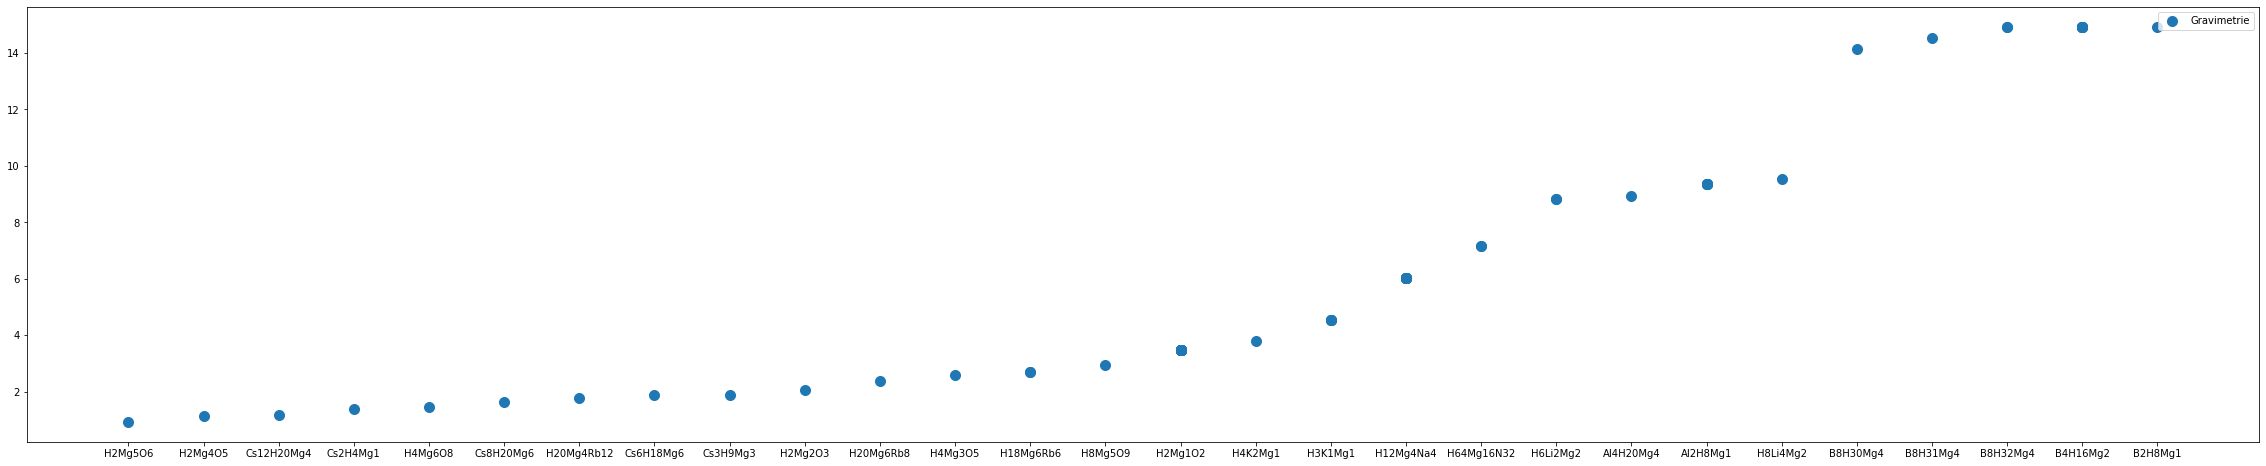

In [263]:
df_Gr_array=np.array(df["Gravimetrie"])
indice=df_Gr_array.argsort()  #  to extract indix 
x=np.array(df["compound"])[indice]#  
y=compare_array_float(df_Gr_array) #  to ordred the gravimetrie values 

plt.figure(figsize=(40,8))
plt.scatter(x,y,s=100,label="Gravimetrie")
plt.legend()

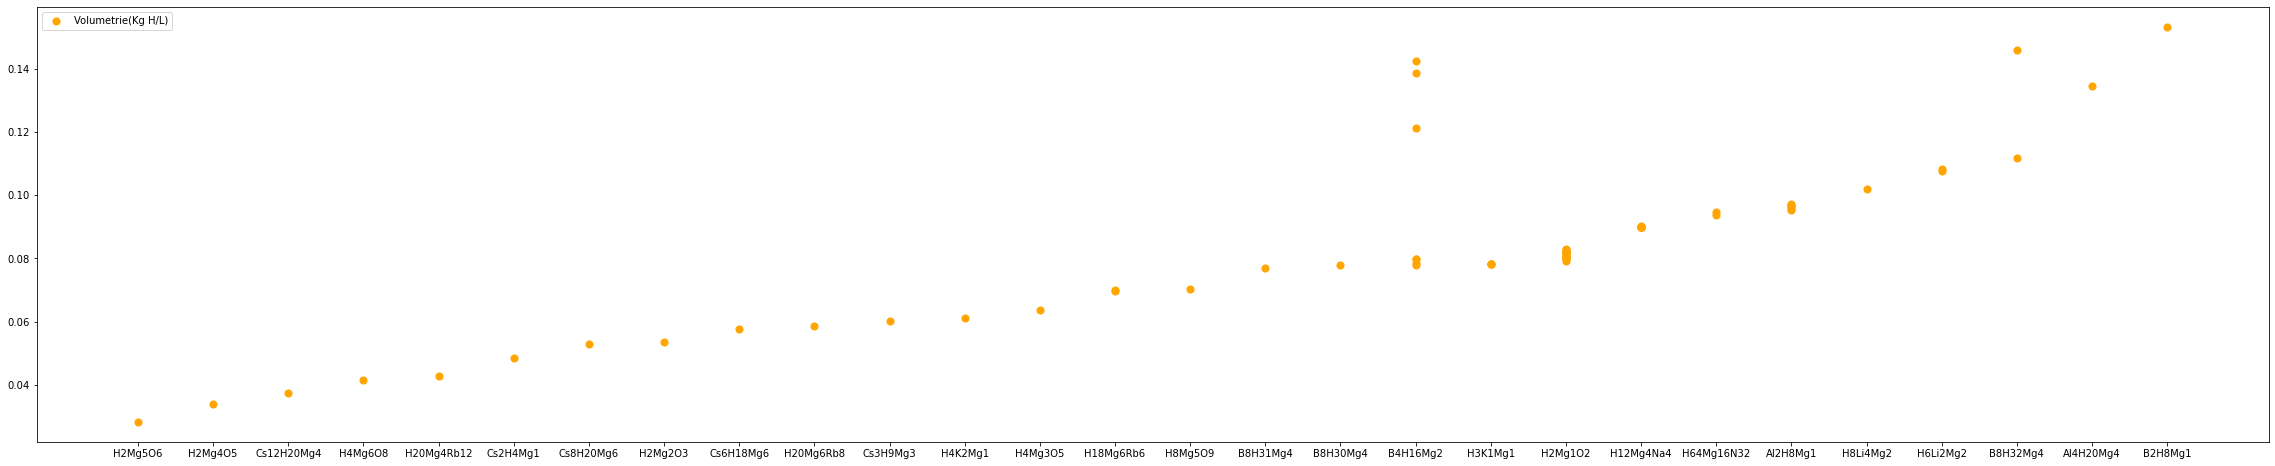

In [264]:
df_V_array=np.array(df["Volumetrie(Kg H/L)"])
indice=df_V_array.argsort()  #  to extract indix 
x1=np.array(df["compound"])[indice]#  
y1=compare_array_float(df_V_array)

plt.figure(figsize=(40,8))
plt.scatter(x1,y1,s=50,c='orange',label="Volumetrie(Kg H/L)")
plt.legend()

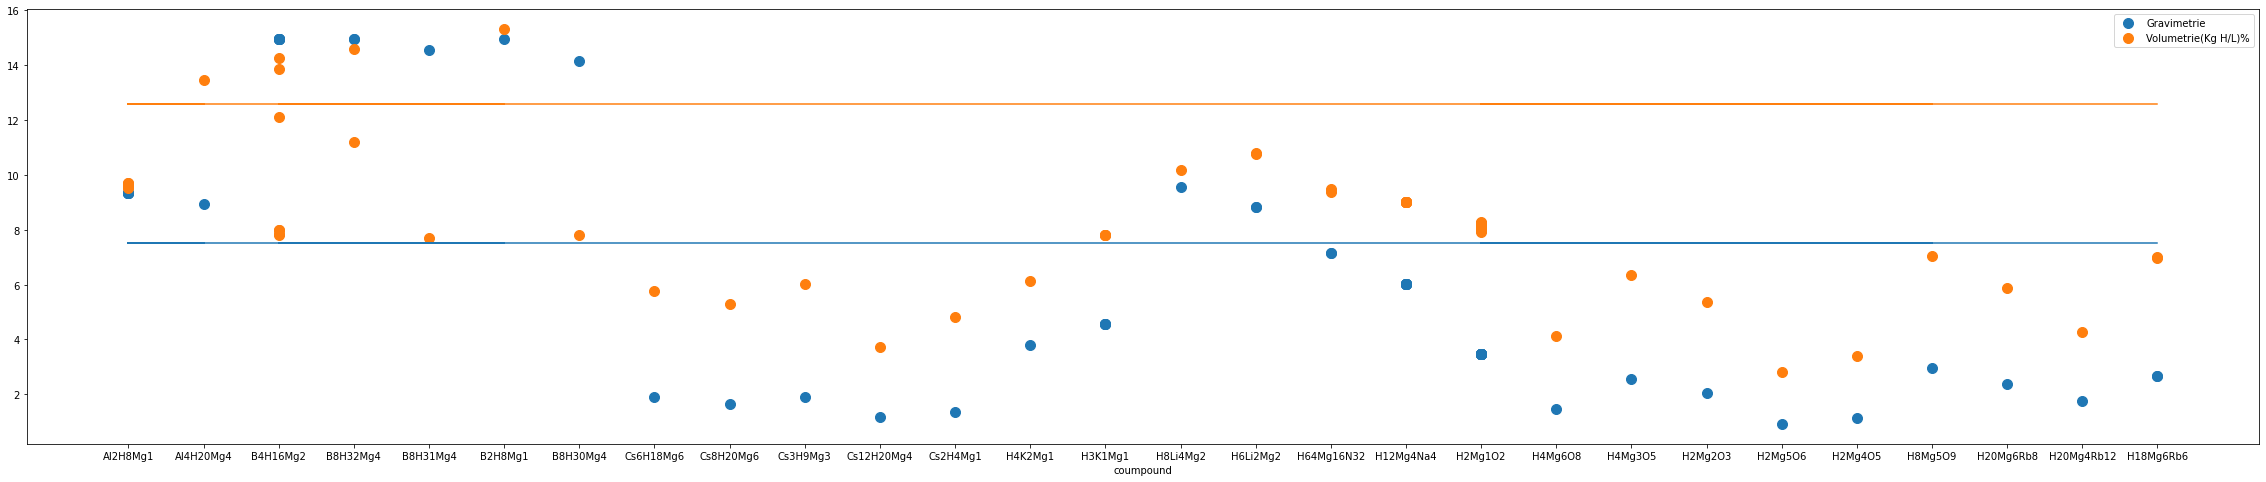

In [265]:
x=np.array(df["compound"])#  
y=np.array(df['Gravimetrie'])  
y1=np.array(df['Volumetrie(Kg H/L)'])
lG=np.ones((len(x)))*7.5
lV=np.ones((len(x)))*0.126

plt.figure(figsize=(40,8))
plt.scatter(x,y,s=100,label="Gravimetrie")
#we change the scale for y1 axis.
plt.scatter(x,y1*100,s=100,label='Volumetrie(Kg H/L)%')
plt.plot(x,lG)
plt.plot(x,lV*100)
plt.xlabel("coumpound")
plt.legend()
